In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [3]:
#To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

#Common Imports
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

np.random.seed(42)

# **GET THE DATA**

In [4]:
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    return

fetch_housing_data()

In [5]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing_data = load_housing_data()
print(housing_data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [6]:
#Getting the info about the dataset
print(housing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [7]:
numerical_attributes = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population",
                        "households", "median_income"]
categorical_attributes = ["ocean_proximity"]
print(housing_data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

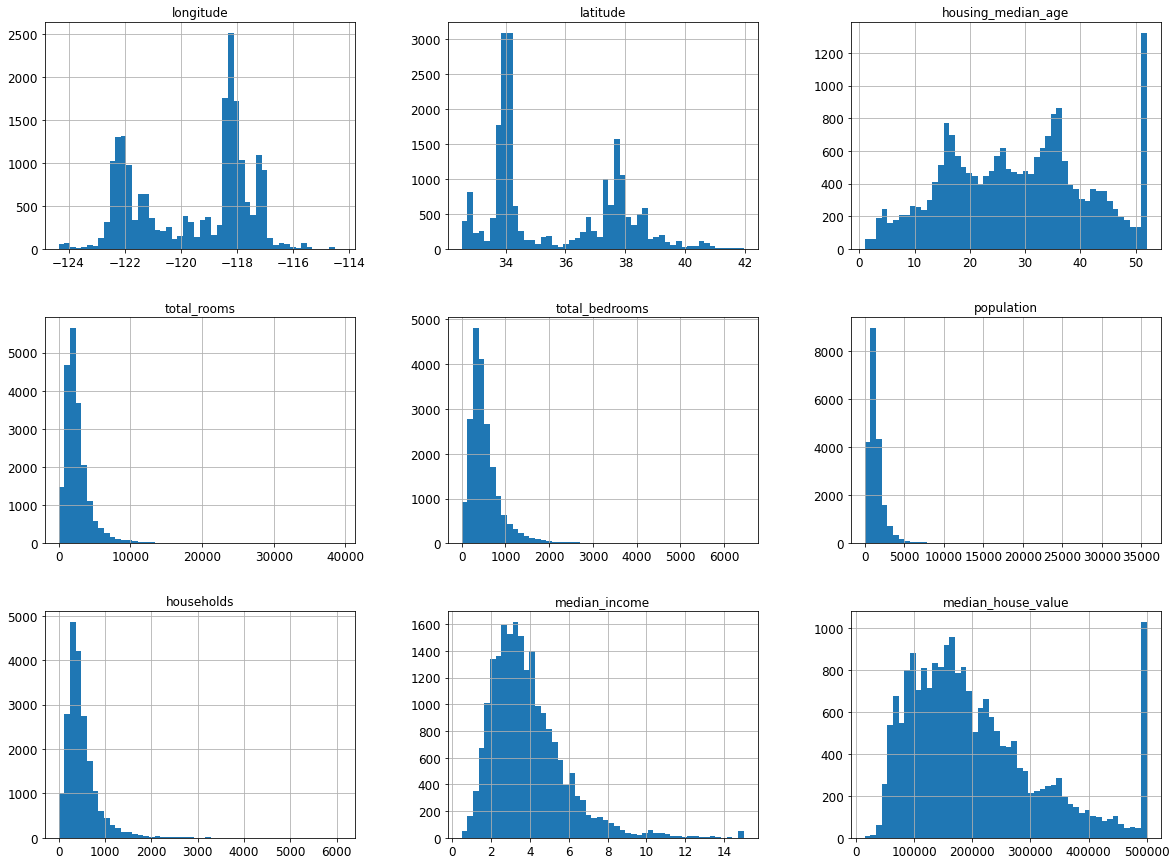

In [8]:
#Visualising The Data
%matplotlib inline
housing_data.hist(bins=50, figsize=(20,15))
plt.show()

# **SPLITTING THE DATA**

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

housing_data["income_cat"] = np.ceil(housing_data["median_income"]/1.5)
housing_data["income_cat"].where(housing_data["income_cat"]>5, 5.0, inplace=True)
data = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in data.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

# Dropping the "income_cat" attribute
for x in (strat_train_set, strat_test_set):
    x.drop("income_cat", axis=1, inplace=True)

training_set = strat_train_set.copy()
testing_set = strat_test_set.copy()

# **VISUALIZING THE DATA TO GAIN INSIGHTS**

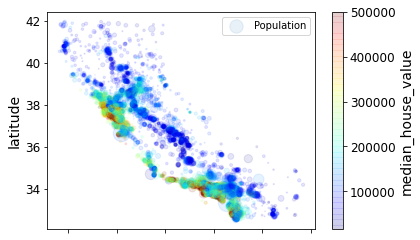

In [10]:
training_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, 
                  s=training_set["population"]/100, label="Population", c="median_house_value",
                  cmap=plt.get_cmap("jet"), colorbar=True)

In [11]:
correlation_matrix = training_set.corr()
print(correlation_matrix["median_house_value"].sort_values(ascending=True))

latitude             -0.140169
longitude            -0.050312
population           -0.024797
total_bedrooms        0.050092
households            0.065741
housing_median_age    0.104035
total_rooms           0.132777
median_income         0.686214
median_house_value    1.000000
Name: median_house_value, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cff9db790>,
      dtype=object)

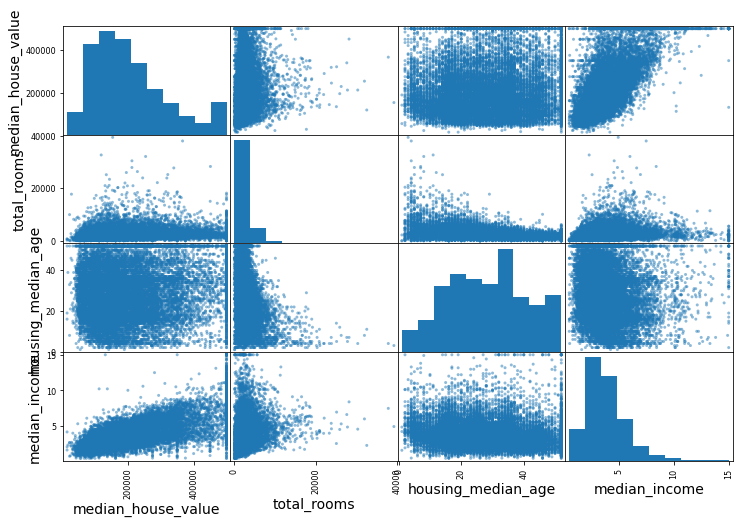

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(training_set[["median_house_value", "total_rooms", "housing_median_age", "median_income"]], figsize=(12, 8))

# **NOW WE PREPARE THE DATA FOR ML ALGORITHM**

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

predictors = training_set.drop("median_house_value", axis=1)
labels = training_set["median_house_value"].copy()
imputer = SimpleImputer(strategy="median")

In [14]:
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(predictors.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]
class AttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/X[:, household_ix]
        population_per_household = X[:, population_ix]/X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

numerical_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy="median")),
            ('attribute_adder', AttributesAdder()),
            ('Scaler', StandardScaler()),
            ])

categorical_pipeline = Pipeline([
            ('encoding', OneHotEncoder()),
            ])

full_pipeline = ColumnTransformer([
                ("num", numerical_pipeline, numerical_attributes),
                ("cat", categorical_pipeline, categorical_attributes),
            ])
prepared_data = full_pipeline.fit_transform(predictors)
print(prepared_data)

[[-0.5502143  -0.15255473  0.26789644 ...  0.          0.
   1.        ]
 [-1.11427484  2.212913   -0.20767267 ...  0.          0.
   0.        ]
 [-1.19414182  0.99263203 -2.10994909 ...  0.          0.
   0.        ]
 ...
 [-1.15420833  0.85183037 -0.92102633 ...  0.          0.
   0.        ]
 [ 0.63780702 -0.772082    1.37755769 ...  0.          0.
   0.        ]
 [-0.63008128  1.00671219 -0.68324177 ...  0.          0.
   0.        ]]


# ****TRAINING A MODEL****
****1. LINEAR REGRESSION****

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
lin_reg.fit(prepared_data, labels)
predictions = lin_reg.predict(prepared_data)
rmse = np.sqrt(mean_squared_error(labels, predictions))
validation_scores = cross_val_score(lin_reg, prepared_data, labels, scoring="neg_mean_squared_error", cv=10)
validation_scores = np.sqrt(-validation_scores)  #root mean squared error
print("ROOT MEAN SQUARED ERROR = ", rmse)
print("VALIDATION SCORES = ", validation_scores)

ROOT MEAN SQUARED ERROR =  68744.72163036217
VALIDATION SCORES =  [76500.81429098 67303.19524308 71615.63063351 69931.48479511
 66762.1526088  69843.36057843 65866.8368432  70421.95959386
 64289.14603427 68620.49581086]


**2. POLYNOMIAL REGRESSION**

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(prepared_data)
P_reg = LinearRegression()
P_reg.fit(X_poly, labels)
predictions = P_reg.predict(X_poly)
rmse = np.sqrt(mean_squared_error(labels, predictions))
validation_scores = cross_val_score(P_reg, X_poly, labels, scoring="neg_mean_squared_error", cv=10)
validation_scores = np.sqrt(-validation_scores)  #root mean squared error
print("ROOT MEAN SQUARED ERROR = ", rmse)
print("VALIDATION SCORES = ", validation_scores)

ROOT MEAN SQUARED ERROR =  60820.657158317925
VALIDATION SCORES =  [4.18695415e+12 1.05294391e+05 1.28873530e+13 1.01049073e+05
 6.11106971e+04 1.17537919e+05 5.93201396e+04 3.41733106e+05
 5.82590258e+04 6.18326501e+04]


**3. RIDGE REGRESSION**

In [17]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(prepared_data, labels)
predictions = ridge_reg.predict(prepared_data)
rmse = np.sqrt(mean_squared_error(labels, predictions))
validation_scores = cross_val_score(ridge_reg, prepared_data, labels, scoring="neg_mean_squared_error", cv=10)
validation_scores = np.sqrt(-validation_scores)  #root mean squared error
print("ROOT MEAN SQUARED ERROR = ", rmse)
print("VALIDATION SCORES = ", validation_scores)

ROOT MEAN SQUARED ERROR =  68745.40363445393
VALIDATION SCORES =  [76509.97230689 67304.95057258 71514.05792878 69933.46513394
 66761.62306663 69843.73971542 65867.81253705 70416.68466936
 64289.22016708 68620.58050051]


**4. LASSO REGRESSION**

In [18]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1, max_iter=100000, tol=0.01)
lasso_reg.fit(prepared_data, labels)
predictions = lasso_reg.predict(prepared_data)
rmse = np.sqrt(mean_squared_error(labels, predictions))
validation_scores = cross_val_score(lasso_reg, prepared_data, labels, scoring="neg_mean_squared_error", cv=10)
validation_scores = np.sqrt(-validation_scores)  #root mean squared error
print("ROOT MEAN SQUARED ERROR = ", rmse)
print("VALIDATION SCORES = ", validation_scores)

ROOT MEAN SQUARED ERROR =  68744.72203842788
VALIDATION SCORES =  [76501.24742176 67303.2316757  71612.84398932 69931.52642869
 66762.12020916 69843.35888873 65866.87614572 70421.55019132
 64289.15208961 68620.4850599 ]


**5. SVM REGRESSOR**

In [19]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=10, C=10000)
svm_reg.fit(prepared_data, labels)
predictions = svm_reg.predict(prepared_data)
rmse = np.sqrt(mean_squared_error(labels, predictions))
validation_scores = cross_val_score(svm_reg, prepared_data, labels, scoring="neg_mean_squared_error", cv=10)
validation_scores = np.sqrt(-validation_scores)  #root mean squared error
print("ROOT MEAN SQUARED ERROR = ", rmse)
print("VALIDATION SCORES = ", validation_scores)

ROOT MEAN SQUARED ERROR =  70395.24976461846
VALIDATION SCORES =  [77503.70318007 68491.03905422 74502.03443387 71092.11675455
 67646.73962188 71509.74094126 67473.62845464 83296.0267932
 65262.67192219 70148.32606347]


**6. KERNELIZED SVM REGRESSOR**

In [20]:
from sklearn.svm import SVR
svm_reg = SVR(kernel="poly", degree=2, C=10000, epsilon=0.1)
svm_reg.fit(prepared_data, labels)
predictions = svm_reg.predict(prepared_data)
rmse = np.sqrt(mean_squared_error(labels, predictions))
validation_scores = cross_val_score(svm_reg, prepared_data, labels, scoring="neg_mean_squared_error", cv=10)
validation_scores = np.sqrt(-validation_scores)  #root mean squared error
print("ROOT MEAN SQUARED ERROR = ", rmse)
print("VALIDATION SCORES = ", validation_scores)

ROOT MEAN SQUARED ERROR =  71476.12241165152
VALIDATION SCORES =  [ 84764.38439227  69848.39523983 110346.7619907   72352.5623774
  68324.37373232  72515.04862919  67971.69540785  83521.06056838
  67306.2593276   72050.61000782]


**7. DESICION TREE REGRESSOR**

In [21]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(prepared_data, labels)
predictions = tree_reg.predict(prepared_data)
rmse = np.sqrt(mean_squared_error(labels, predictions))
validation_scores = cross_val_score(svm_reg, prepared_data, labels, scoring="neg_mean_squared_error", cv=10)
validation_scores = np.sqrt(-validation_scores)  #root mean squared error
print("ROOT MEAN SQUARED ERROR = ", rmse)
print("VALIDATION SCORES = ", validation_scores)

ROOT MEAN SQUARED ERROR =  0.0
VALIDATION SCORES =  [ 84764.38439227  69848.39523983 110346.7619907   72352.5623774
  68324.37373232  72515.04862919  67971.69540785  83521.06056838
  67306.2593276   72050.61000782]


**8. RANDOM FOREST REGREESOR**

In [22]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(prepared_data, labels)
predictions = forest_reg.predict(prepared_data)
rmse = np.sqrt(mean_squared_error(labels, predictions))
validation_scores = cross_val_score(svm_reg, prepared_data, labels, scoring="neg_mean_squared_error", cv=10)
validation_scores = np.sqrt(-validation_scores)  #root mean squared error
print("ROOT MEAN SQUARED ERROR = ", rmse)
print("VALIDATION SCORES = ", validation_scores)

ROOT MEAN SQUARED ERROR =  21992.31785393218
VALIDATION SCORES =  [ 84764.38439227  69848.39523983 110346.7619907   72352.5623774
  68324.37373232  72515.04862919  67971.69540785  83521.06056838
  67306.2593276   72050.61000782]


# **FINE TUNING THE SELECTED MODEL**

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = [
            {'n_estimators': [3, 10, 20, 25, 30], 'max_features': [2, 4, 6, 8], 'bootstrap': [True, False]}
            ]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(prepared_data, labels)
print("The best parameters for Random Forest Regressor is : ", grid_search.best_params_)
scores = grid_search.cv_results_
for mean_score, params in zip(scores["mean_test_score"], scores["params"]):
    print(np.sqrt(-mean_score), params)

The best parameters for Random Forest Regressor is :  {'bootstrap': False, 'max_features': 4, 'n_estimators': 30}
64190.93479461126 {'bootstrap': True, 'max_features': 2, 'n_estimators': 3}
55401.759097747345 {'bootstrap': True, 'max_features': 2, 'n_estimators': 10}
53661.12448662878 {'bootstrap': True, 'max_features': 2, 'n_estimators': 20}
53283.3879873799 {'bootstrap': True, 'max_features': 2, 'n_estimators': 25}
52999.270877040726 {'bootstrap': True, 'max_features': 2, 'n_estimators': 30}
59118.21084747472 {'bootstrap': True, 'max_features': 4, 'n_estimators': 3}
52158.07930324916 {'bootstrap': True, 'max_features': 4, 'n_estimators': 10}
50323.45108847315 {'bootstrap': True, 'max_features': 4, 'n_estimators': 20}
50151.21134520678 {'bootstrap': True, 'max_features': 4, 'n_estimators': 25}
49922.495721823485 {'bootstrap': True, 'max_features': 4, 'n_estimators': 30}
58682.4582225946 {'bootstrap': True, 'max_features': 6, 'n_estimators': 3}
51994.51178357868 {'bootstrap': True, 'ma

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = [
            {'n_estimators': randint(low=1, high=200),
             'max_features': randint(low=1, high=8),
             'bootstrap': [True, False]}
            ]
random_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, cv=5,
                                   n_iter=10, scoring="neg_mean_squared_error", random_state=42)
random_search.fit(prepared_data, labels)
print("The best parameters for Random Forest Regressor is : ", random_search.best_params_)
scores = random_search.cv_results_
for mean_score, params in zip(scores["mean_test_score"], scores["params"]):
    print(np.sqrt(-mean_score), params)

The best parameters for Random Forest Regressor is :  {'bootstrap': False, 'max_features': 6, 'n_estimators': 38}
49320.17330774116 {'bootstrap': True, 'max_features': 4, 'n_estimators': 93}
50465.504579906155 {'bootstrap': True, 'max_features': 3, 'n_estimators': 72}
49563.07946120668 {'bootstrap': True, 'max_features': 5, 'n_estimators': 103}
49313.62834184422 {'bootstrap': False, 'max_features': 3, 'n_estimators': 75}
49574.830542587246 {'bootstrap': True, 'max_features': 5, 'n_estimators': 100}
49083.73634087775 {'bootstrap': False, 'max_features': 3, 'n_estimators': 150}
51827.549129219246 {'bootstrap': True, 'max_features': 2, 'n_estimators': 88}
49029.0026210022 {'bootstrap': False, 'max_features': 6, 'n_estimators': 38}
49418.69741558264 {'bootstrap': False, 'max_features': 4, 'n_estimators': 21}
49430.20699651783 {'bootstrap': True, 'max_features': 4, 'n_estimators': 58}


# **FINAL MODEL**

In [32]:
final_model = random_search.best_estimator_
x_test = testing_set.drop("median_house_value", axis=1)
y_test = testing_set["median_house_value"].copy()

x_test_prepared = full_pipeline.transform(x_test)
final_predictions = final_model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("The root mean squared error of the test data is :", final_rmse)

The root mean squared error of the test data is : 47755.95732372947
